In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

X_train = pd.read_csv('train.csv')
X_test = pd.read_csv('test.csv')

In [78]:
X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [80]:
X_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [81]:
X_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [82]:
#object 타입 보기
X_train.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [83]:
#좌석 등급이 낮을 수록(좋을 수록) 생존률이 높았다.
X_train.groupby('Pclass').mean()['Survived']

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [84]:
#여자가 남자보다 생존률이 높았다.
X_train.groupby('Sex').mean()['Survived']

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [85]:
#동행이 적을 수록 생존률이 올라가긴함
X_train.groupby('SibSp').mean()['Survived'].sort_values(ascending = False)

SibSp
1    0.535885
2    0.464286
0    0.345395
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [86]:
#동행이 적을 수록 생존률이 올라가긴함
X_train.groupby('Parch').mean()['Survived'].sort_values(ascending = False)

Parch
3    0.600000
1    0.550847
2    0.500000
0    0.343658
5    0.200000
4    0.000000
6    0.000000
Name: Survived, dtype: float64

In [87]:
#나이 별 생존자와 사망자
X_train_sur = X_train[X_train['Survived']==1]
X_train_die = X_train[X_train['Survived']==0]

(array([27.,  9.,  4., 15., 27., 36., 30., 35., 35., 17., 12., 12., 14.,
         7.,  5.,  4.,  0.,  0.,  0.,  1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <BarContainer object of 20 artists>)

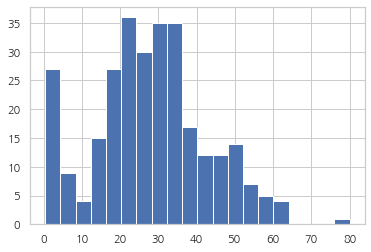

In [88]:
#생존
#5세이하가 많다.
plt.hist(X_train_sur['Age'], bins = 20)

(array([13.,  5., 11.,  5., 51., 48., 56., 54., 30., 34., 28., 17., 23.,
        15.,  7.,  8.,  7.,  6.,  2.,  4.]),
 array([ 1.  ,  4.65,  8.3 , 11.95, 15.6 , 19.25, 22.9 , 26.55, 30.2 ,
        33.85, 37.5 , 41.15, 44.8 , 48.45, 52.1 , 55.75, 59.4 , 63.05,
        66.7 , 70.35, 74.  ]),
 <BarContainer object of 20 artists>)

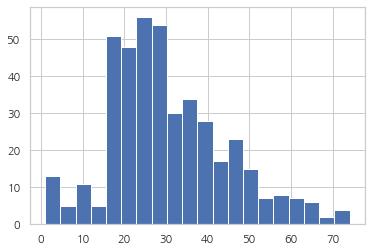

In [89]:
#사망
plt.hist(X_train_die['Age'], bins = 20)

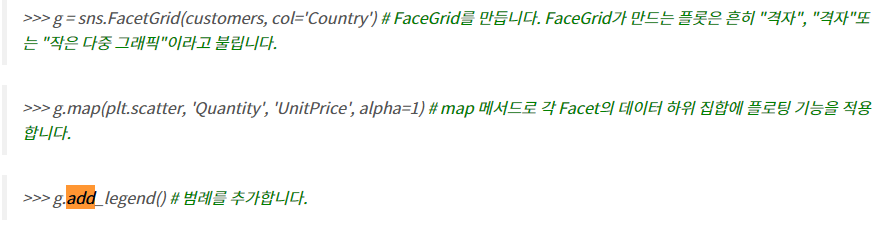

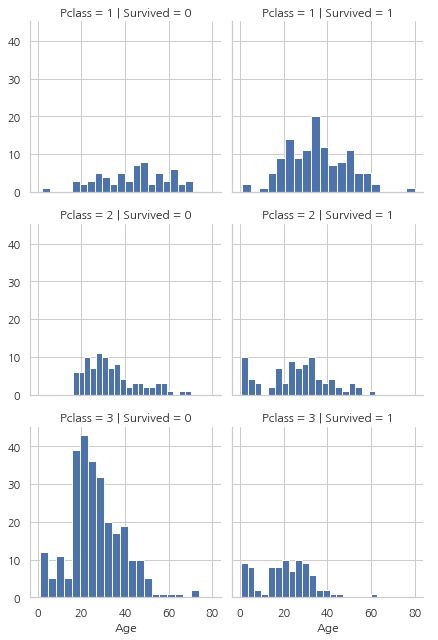

In [90]:
#객실 등급과 생존여부, 연령
g = sns.FacetGrid(X_train, row = 'Pclass', col = 'Survived')
g.map(plt.hist, 'Age', bins = 20)
g.add_legend()

#1등급의 경우 대부분이 생존
#2등급의 경우 유아 대부분이 생존
#3등급의 경우 사람이 가장 많고 상당부분 사망

In [91]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [92]:
X_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [93]:
X_train['Embarked'].fillna('S', inplace = True)

In [94]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [95]:
X_train.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [96]:
X_train['Age'].fillna(X_train.Age.mean(), inplace = True)

In [97]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [98]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [99]:
X_test['Age'].fillna(X_test.Age.mean(), inplace = True)

In [100]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [101]:
X_train.drop(['PassengerId','Name', 'Ticket', 'Cabin'], axis = 1,inplace = True)
X_test.drop(['PassengerId','Name', 'Ticket','Cabin'], axis = 1, inplace = True)

In [102]:
X_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,29.699118,0,0,8.4583,Q
6,0,1,male,54.000000,0,0,51.8625,S
7,0,3,male,2.000000,3,1,21.0750,S
8,1,3,female,27.000000,0,2,11.1333,S
9,1,2,female,14.000000,1,0,30.0708,C


In [103]:
from sklearn.preprocessing import LabelEncoder

In [104]:
encoder = LabelEncoder()
X_train['Sex'] = encoder.fit_transform(X_train['Sex'])
X_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,S
1,1,1,0,38.000000,1,0,71.2833,C
2,1,3,0,26.000000,0,0,7.9250,S
3,1,1,0,35.000000,1,0,53.1000,S
4,0,3,1,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,S
887,1,1,0,19.000000,0,0,30.0000,S
888,0,3,0,29.699118,1,2,23.4500,S
889,1,1,1,26.000000,0,0,30.0000,C


In [105]:
X_train['Embarked'] = encoder.fit_transform(X_train['Embarked'])
X_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [106]:
X_test['Sex'] = encoder.fit_transform(X_test['Sex'])
X_test['Embarked'] = encoder.fit_transform(X_test['Embarked'])
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,1
1,3,0,47.00000,1,0,7.0000,2
2,2,1,62.00000,0,0,9.6875,1
3,3,1,27.00000,0,0,8.6625,2
4,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2
414,1,0,39.00000,0,0,108.9000,0
415,3,1,38.50000,0,0,7.2500,2
416,3,1,30.27259,0,0,8.0500,2


In [107]:
from sklearn.preprocessing import MinMaxScaler

In [108]:
scaler = MinMaxScaler()
XAge = X_train['Age']
XAge = XAge.values.reshape(-1,1)
X_train['Age'] = scaler.fit_transform(XAge)
X_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0.271174,1,0,7.2500,2
1,1,1,0,0.472229,1,0,71.2833,0
2,1,3,0,0.321438,0,0,7.9250,2
3,1,1,0,0.434531,1,0,53.1000,2
4,0,3,1,0.434531,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,0.334004,0,0,13.0000,2
887,1,1,0,0.233476,0,0,30.0000,2
888,0,3,0,0.367921,1,2,23.4500,2
889,1,1,1,0.321438,0,0,30.0000,0


In [109]:
XAge = X_test['Age']
XAge = XAge.values.reshape(-1,1)
X_test['Age'] = scaler.fit_transform(XAge)
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,0.452723,0,0,7.8292,1
1,3,0,0.617566,1,0,7.0000,2
2,2,1,0.815377,0,0,9.6875,1
3,3,1,0.353818,0,0,8.6625,2
4,3,0,0.287881,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,0.396975,0,0,8.0500,2
414,1,0,0.512066,0,0,108.9000,0
415,3,1,0.505473,0,0,7.2500,2
416,3,1,0.396975,0,0,8.0500,2


In [126]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 590 to 265
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int32  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(3)
memory usage: 48.7 KB


In [110]:
y_train = X_train['Survived']
X_train.drop('Survived', axis = 1, inplace = True)

In [111]:
X_train.shape

(891, 7)

In [112]:
X_test.shape

(418, 7)

In [113]:
y_train.shape

(891,)

In [128]:
X_train['Fare'] = X_train['Fare'].astype('float32')
X_test['Fare'] = X_test['Fare'].astype('float32')

In [136]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int32  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float32
 6   Embarked  418 non-null    int32  
dtypes: float32(1), float64(1), int32(2), int64(3)
memory usage: 18.1 KB


In [137]:
X_test.fillna(0, inplace = True)

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [139]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state = 10)

In [140]:
logistic = LogisticRegression()
svc = SVC()
kneighbor = KNeighborsClassifier()
rfc = RandomForestClassifier()
gnb = GaussianNB()
mnb = MultinomialNB()

In [141]:
logistic.fit(X_train, y_train)
svc.fit(X_train, y_train)
kneighbor.fit(X_train, y_train)
rfc.fit(X_train, y_train)
gnb.fit(X_train, y_train)
mnb.fit(X_train, y_train)

MultinomialNB()

In [142]:
pred1 = logistic.predict(X_test)
pred2 = svc.predict(X_test)
pred3 = kneighbor.predict(X_test)
pred4 = rfc.predict(X_test)
pred5 = gnb.predict(X_test)
pred6 = mnb.predict(X_test)

In [143]:
print("score",1, logistic.score(X_train, y_train))
print("score",2, svc.score(X_train, y_train))
print("score",3, kneighbor.score(X_train, y_train))
print("score",4, rfc.score(X_train, y_train))
print("score",5, gnb.score(X_train, y_train))
print("score",6, mnb.score(X_train, y_train))

score 1 0.8024691358024691
score 2 0.6801346801346801
score 3 0.8361391694725028
score 4 0.9820426487093153
score 5 0.792368125701459
score 6 0.6947250280583613


In [144]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
pred7 = abc.predict(X_test)
abc.score(X_train, y_train)

0.8338945005611672

# rfc선택

In [145]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,0.452723,0,0,7.829200,1
1,3,0,0.617566,1,0,7.000000,2
2,2,1,0.815377,0,0,9.687500,1
3,3,1,0.353818,0,0,8.662500,2
4,3,0,0.287881,1,1,12.287500,2
...,...,...,...,...,...,...,...
413,3,1,0.396975,0,0,8.050000,2
414,1,0,0.512066,0,0,108.900002,0
415,3,1,0.505473,0,0,7.250000,2
416,3,1,0.396975,0,0,8.050000,2


In [146]:
test = pd.read_csv('test.csv')

In [147]:
submission = pd.DataFrame( {
    "PassengerId" : test['PassengerId'],
    "Survived":pred4
})

In [148]:
submission.to_csv('result.csv', index = False)

# 모델 개선

In [125]:
train = pd.read_csv('train.csv')

<AxesSubplot:>

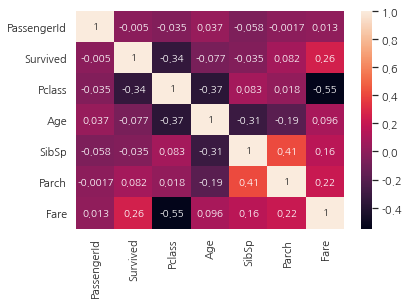

In [73]:
sns.heatmap(train.corr(), annot = True)